In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf

In [ ]:
df = pd.read_csv("cardio_train.csv", sep=";") #https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?resource=download

# Checking data

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df = df.drop('id', axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
len(df[df['cardio']==1]), len(df[df['cardio']==0])

(34979, 35021)

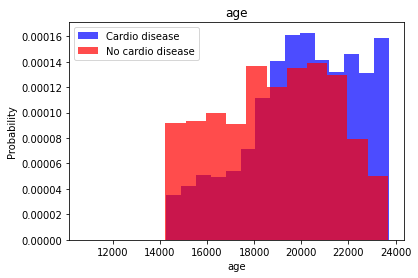

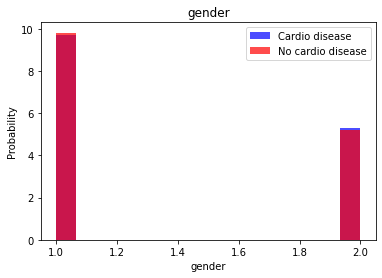

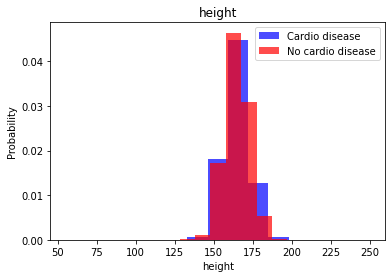

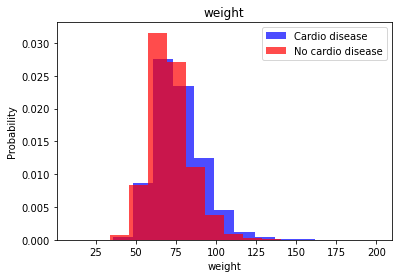

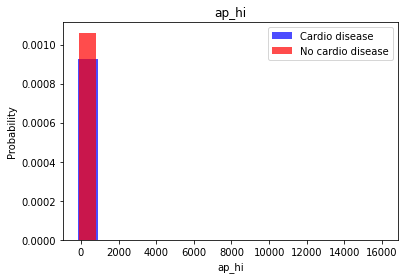

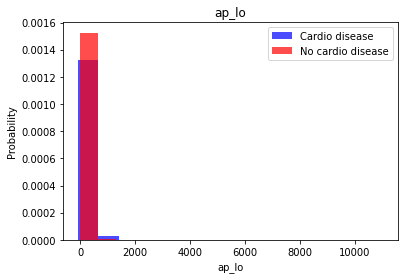

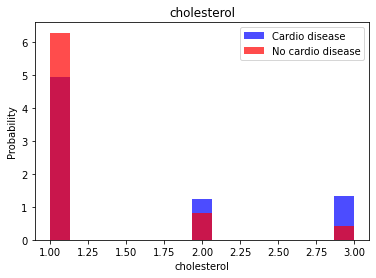

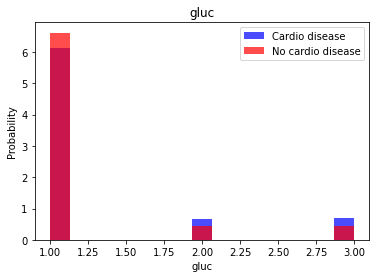

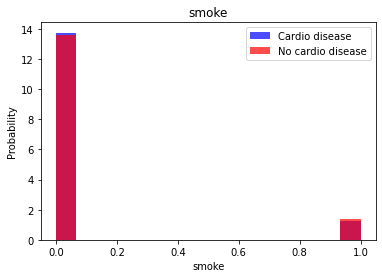

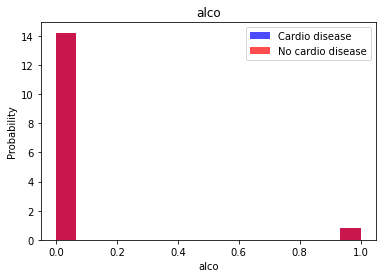

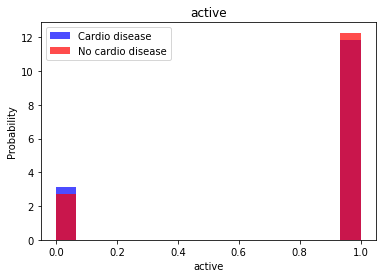

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['cardio']==1][label], color="blue", label="Cardio disease", alpha=0.7, bins=15, density=True)
  plt.hist(df[df['cardio']==0][label], color="red", label="No cardio disease", alpha=0.7, bins=15, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Scaling data


In [ ]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

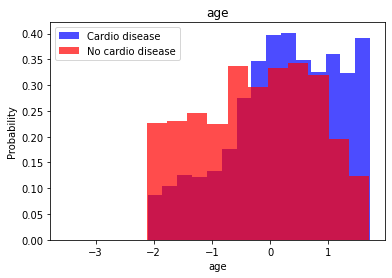

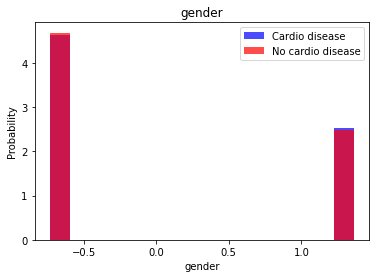

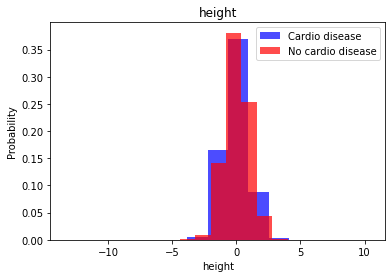

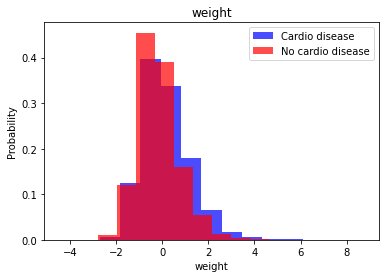

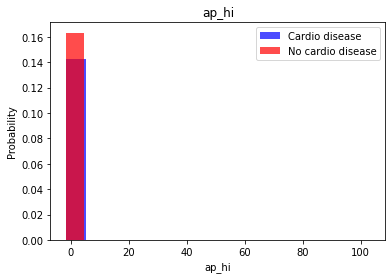

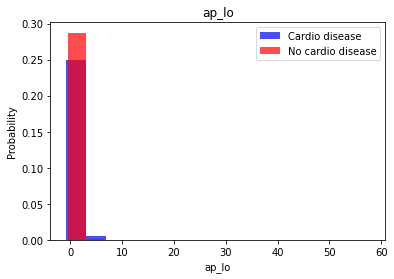

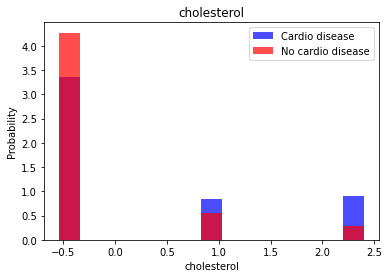

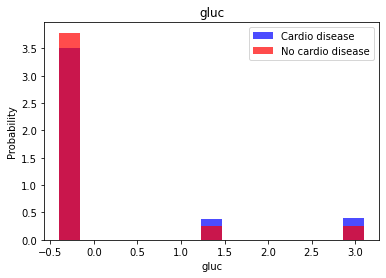

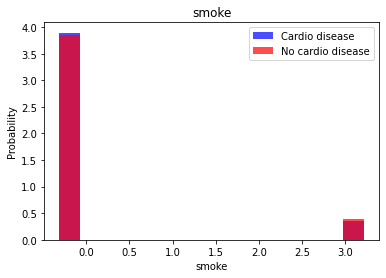

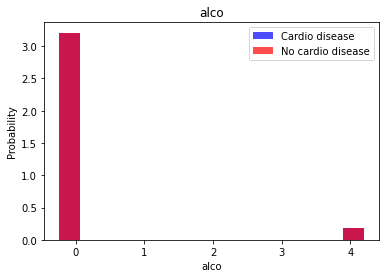

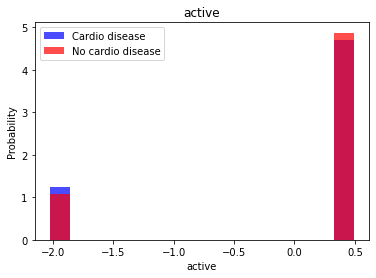

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['cardio']==1][label], color="blue", label="Cardio disease", alpha=0.7, bins=15, density=True)
  plt.hist(transformed_df[transformed_df['cardio']==0][label], color="red", label="No cardio disease", alpha=0.7, bins=15, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

# Linear SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

acc_svc = round(svc.score(x_valid, y_valid), 4)
acc_svc

0.7204

In [ ]:
# Test
print(x_test[2])
print(y_test[2])
svc.predict([x_test[2]])

[-0.52360894  1.36405487  0.56525373 -0.22268457  0.07910323 -0.03517999
  0.93073542 -0.39571994 -0.31087913 -0.23838436 -2.02360695]
1


array([1])

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

acc_dec_tree = round(dec_tree.score(x_valid, y_valid), 4)
acc_dec_tree

0.6324

In [ ]:
# Test
print(x_test[2])
print(y_test[2])
dec_tree.predict(x_test)[2]

[-0.52360894  1.36405487  0.56525373 -0.22268457  0.07910323 -0.03517999
  0.93073542 -0.39571994 -0.31087913 -0.23838436 -2.02360695]
1


1

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

acc_gnb = round(gnb.score(x_valid, y_valid), 4)
acc_gnb

0.5916

In [ ]:
# Test
print(x_test[2])
print(y_test[2])
gnb.predict(x_test)[2]

[-0.52360894  1.36405487  0.56525373 -0.22268457  0.07910323 -0.03517999
  0.93073542 -0.39571994 -0.31087913 -0.23838436 -2.02360695]
1


0

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

acc_lr = round(lr.score(x_valid, y_valid), 4)
acc_lr

0.7176

In [ ]:
# Test
print(x_test[2])
print(y_test[2])
lr.predict(x_test)[2]

[-0.52360894  1.36405487  0.56525373 -0.22268457  0.07910323 -0.03517999
  0.93073542 -0.39571994 -0.31087913 -0.23838436 -2.02360695]
1


1

# Neural Network

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [ ]:
model.evaluate(x_train, y_train)

1313/1313 [==============================] - 2s 2ms/step - loss: 0.6963 - accuracy: 0.4792


[0.6962735652923584, 0.479190468788147]

In [ ]:
model.evaluate(x_valid, y_valid)

438/438 [==============================] - 1s 1ms/step - loss: 0.6963 - accuracy: 0.4791


[0.6963233351707458, 0.4790714383125305]

In [ ]:
model.fit(x_train, y_train, batch_size=16, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
2625/2625 [==============================] - 7s 2ms/step - loss: 0.6044 - accuracy: 0.6764 - val_loss: 0.5840 - val_accuracy: 0.7146
Epoch 2/10
2625/2625 [==============================] - 7s 3ms/step - loss: 0.5660 - accuracy: 0.7249 - val_loss: 0.5678 - val_accuracy: 0.7229
Epoch 3/10
2625/2625 [==============================] - 7s 2ms/step - loss: 0.5578 - accuracy: 0.7296 - val_loss: 0.5619 - val_accuracy: 0.7259
Epoch 4/10
2625/2625 [==============================] - 6s 2ms/step - loss: 0.5533 - accuracy: 0.7315 - val_loss: 0.5553 - val_accuracy: 0.7264
Epoch 5/10
2625/2625 [==============================] - 6s 2ms/step - loss: 0.5503 - accuracy: 0.7314 - val_loss: 0.5518 - val_accuracy: 0.7266
Epoch 6/10
2625/2625 [==============================] - 6s 2ms/step - loss: 0.5487 - accuracy: 0.7324 - val_loss: 0.5495 - val_accuracy: 0.7291
Epoch 7/10
2625/2625 [==============================] - 7s 3ms/step - loss: 0.5468 - accuracy: 0.7328 - val_loss: 0.5487 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7370


[0.5399326682090759, 0.7369999885559082]